<a href="https://colab.research.google.com/github/maushamkumar/Think-Stats/blob/main/Central_limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d ramjidoolla/ipl-data-set



cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set
License(s): other
  0% 0.00/1.24M [00:00<?, ?B/s]
100% 1.24M/1.24M [00:00<00:00, 113MB/s]


In [9]:
!unzip /content/ipl-data-set.zip -d /content/


Archive:  /content/ipl-data-set.zip
  inflating: /content/Players.xlsx   
replace /content/deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace /content/matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace /content/matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]es
error:  invalid response [[y]es]
replace /content/matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: rename,
new name: kuch.cdv
  inflating: /content/kuch.cdv       
  inflating: /content/most_runs_average_strikerate.csv  
  inflating: /content/teams.csv      
  inflating: /content/teamwise_home_and_away.csv  


In [10]:
import pandas as pd

df = pd.read_csv('/content/most_runs_average_strikerate.csv', encoding='latin1')
df.head()


,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [13]:
runs = df['total_runs']
# strikerate = df['Strike Rate']

In [14]:
runs

0      5426
1      5386
2      4902
3      4717
4      4601
       ... 
511       0
512       0
513       0
514       0
515       0
Name: total_runs, Length: 516, dtype: int64

In [15]:
import seaborn as sns

<ipython-input-16-e77e4904bc40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(runs)


<Axes: xlabel='total_runs', ylabel='Density'>

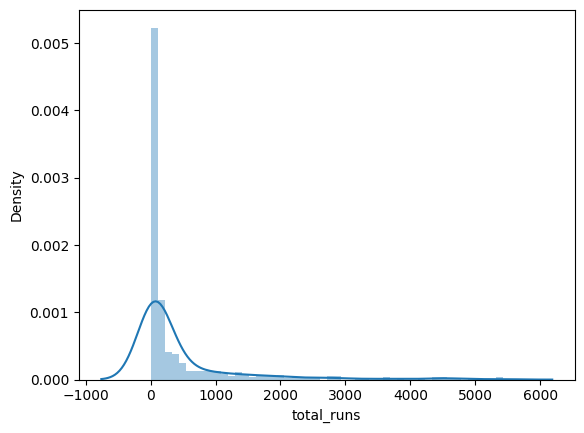

In [16]:
sns.distplot(runs)

In [17]:
print(runs)

0      5426
1      5386
2      4902
3      4717
4      4601
       ... 
511       0
512       0
513       0
514       0
515       0
Name: total_runs, Length: 516, dtype: int64


In [18]:
import numpy as np
runs = np.array(runs)

In [19]:
runs

array([5426, 5386, 4902, 4717, 4601, 4525, 4450, 4420, 4414, 4219, 3834,
       3669, 3590, 3313, 3222, 2886, 2864, 2855, 2772, 2755, 2728, 2589,
       2489, 2427, 2385, 2334, 2215, 2174, 2069, 2038, 2031, 1988, 1977,
       1931, 1861, 1858, 1808, 1767, 1767, 1741, 1696, 1695, 1687, 1555,
       1535, 1494, 1478, 1465, 1441, 1415, 1401, 1400, 1396, 1349, 1322,
       1309, 1288, 1276, 1269, 1153, 1150, 1107, 1093, 1087, 1082, 1079,
       1017, 1013, 1001,  995,  985,  975,  974,  971,  969,  897,  886,
        880,  854,  831,  800,  798,  785,  768,  761,  750,  739,  724,
        701,  676,  672,  663,  641,  608,  604,  604,  584,  577,  563,
        538,  531,  527,  526,  519,  514,  510,  506,  505,  476,  459,
        448,  443,  437,  424,  423,  417,  412,  409,  405,  401,  394,
        390,  388,  376,  375,  368,  366,  365,  342,  340,  339,  337,
        327,  326,  317,  310,  304,  304,  302,  302,  300,  295,  295,
        285,  282,  280,  280,  280,  278,  271,  2

<ipython-input-20-e77e4904bc40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(runs)


<Axes: ylabel='Density'>

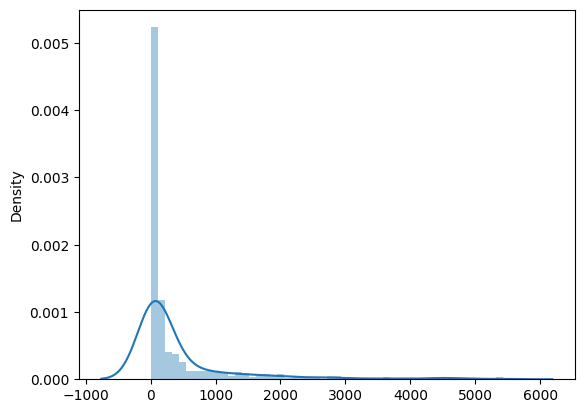

In [20]:
sns.distplot(runs)

In [21]:
# n = 50/515, bastman taken per sample
# m = 1000, number of times sampling done

In [22]:
np.random.choice(runs, size=5)

array([  26,  123, 1478,  124,  117])

In [23]:
m = 1000
n = 50

new = []

for i in range(m):
  x = np.random.choice(runs, size=n)
  new.append(x.mean())


In [24]:
len(new)

1000

In [25]:
new = np.array(new)

<ipython-input-26-0648722b2eae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new)


<Axes: ylabel='Density'>

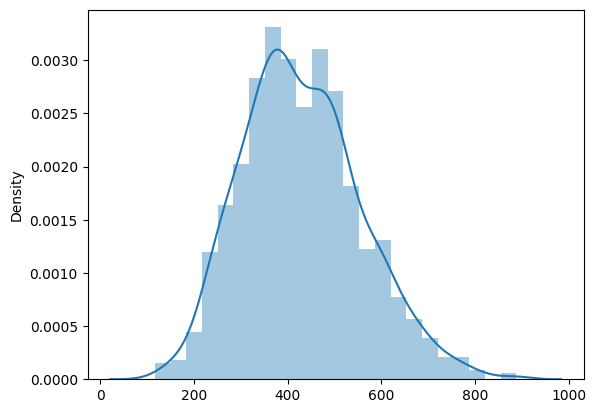

In [26]:
sns.distplot(new)

In [27]:
runs.mean()

430.6259689922481

In [28]:
new.mean()

430.07372

In [29]:
runs.var()

776901.3891705726

In [31]:
runs.var()/50

15538.027783411453

In [30]:
new.var()

16027.9537773616

In [32]:
runs.std()/7.2

122.41945805652014

In [33]:
new.std()

126.60155519329768